<a href="https://colab.research.google.com/github/Nikita1013/Machine-Learning-with-Python/blob/master/Project_8_Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [7]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [8]:
# print first 5 rows of the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [9]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [10]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [11]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [12]:
# checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [13]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation

1. Positive Correlation
2. Negative COrrelation

In [14]:
correlation = gold_data.corr(numeric_only=True)

<Axes: >

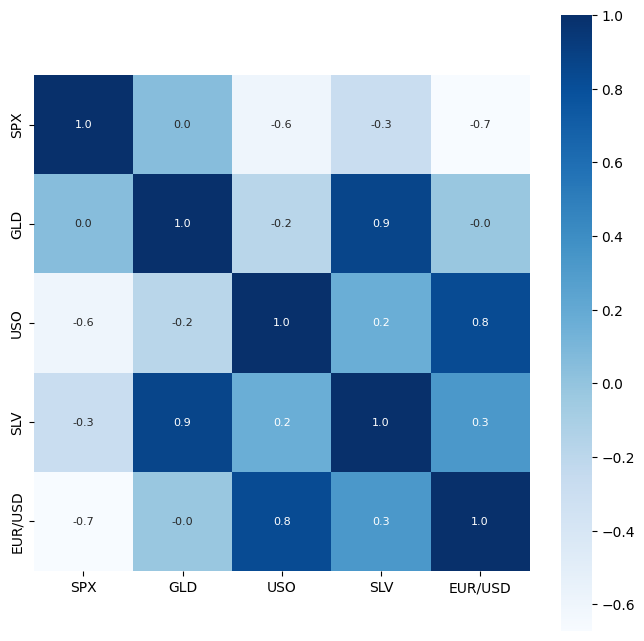

In [15]:
# constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True,square=True, fmt='.1f', annot=True, annot_kws={'size' : 8},  cmap='Blues')

In [16]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-3652147606.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='Green')


<Axes: xlabel='GLD', ylabel='Density'>

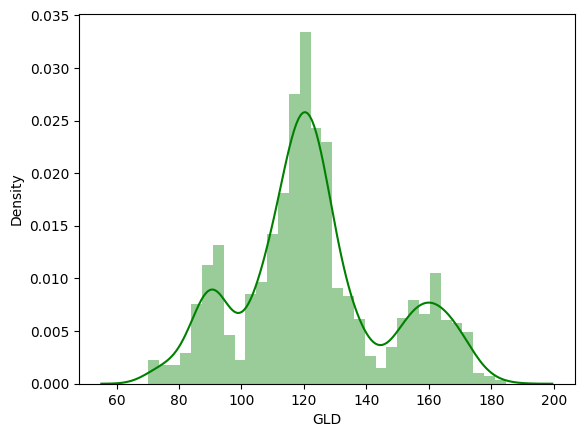

In [17]:
# checkin the distribution of the gold price
sns.distplot(gold_data['GLD'],color='Green')

Splitting the features and target

In [18]:
X = gold_data.drop(['Date','GLD'], axis=1)
Y = gold_data['GLD']

In [19]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [20]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting data into training data and testing data

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=2)

Model Training: Random Forest Regressor

In [23]:
regressor = RandomForestRegressor(n_estimators=100)

In [24]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [25]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [26]:
print(test_data_prediction)

[168.4711998   81.99909984 116.06270059 127.62010059 120.62250137
 154.66939785 150.52289882 126.06480046 117.41659877 125.79010134
 116.74210064 171.98600079 141.53849875 167.94669846 115.29999947
 117.68860062 138.96390292 170.36820165 159.26180279 161.51449956
 155.14670038 125.36820013 175.67119911 158.01730335 125.23050069
  93.79639954  77.23279998 120.50850012 119.08589899 167.34389981
  87.93020066 125.40020074  91.07180051 117.67560027 121.10689879
 135.8838013  115.21570161 115.11270107 147.39469924 107.39310125
 104.10260225  87.02989757 126.57560037 118.04089983 152.46279941
 119.62480018 108.30749972 107.81669802  93.27610016 127.17359747
  74.81570027 113.60239931 121.33480017 111.1993988  119.01599915
 120.57829954 159.12360054 168.1444011  146.9598973   86.00599885
  94.39130035  86.83469902  90.63830008 118.9330007  126.41060061
 127.62440035 169.55929959 122.17749947 117.36239911  98.67760005
 168.91590181 143.19409825 131.88700295 121.20820192 120.73359978
 119.58060

In [27]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared Error : ", error_score)

R Squared Error :  0.9894005813575294


Compare the actual values and predicted values in Plot

In [28]:
Y_test = list(Y_test)

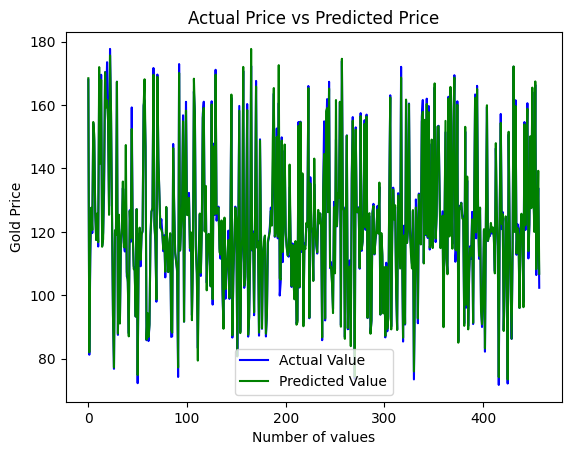

In [31]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()